# 上节回顾

图像基本知识
- 数字图像基本概念
- 图像的读取和显示
- 图像直方图的绘制
- 图像通道及通道的分离与合并
- 颜色空间转化


# 二、图像基本操作

目录
- 2.1 OpenCV 中的绘图函数
- 2.2 图像的几何变换
- 2.3 图像滤波与增强
- 2.4 形态学操作

学习目标
- 会使用 OpenCV 在图像上绘制几何形状及添加文字
- 掌握图像几何变换原理
- 能使用 OpenCV 对图像进行几何变换

## 2.1 绘图函数
### 2.1.1 线段绘制

函数： `cv2.line(img, pts, color, thickness, linetype)`

参数说明

- `img`：待绘制图像（底板，画板）
- `color`：形状的颜色，元组如 `(255,0,0)`
- `pts`：起点和终点
- `thickness`：线条的粗细。`-1` 为填充，默认值是 `1`
- `linetype`：线条的类型，`8` 型或 `cv2.LINE_AA`，默认值为 `8` 型。


代码1：绘制线段

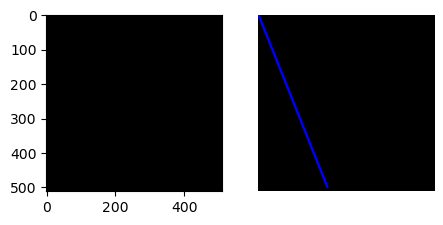

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 创建一张黑色的背景图
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
img = np.zeros((512, 512, 3), np.uint8)
plt.imshow(img)
# 绘制一条线宽为5的线段
plt.subplot(1, 2, 2)
cv2.line(img, (0, 0), (200, 500), (255, 0, 0), 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 不显示坐标轴
plt.show()

### 2.1.2 矩形绘制

函数： `cv2.rectangle(img, prets, color, thickness, linetype)`

参数说明：

- `img`：待绘制图像
- `pts`：左上角和右下角坐标点
- `color`：形状的颜色，元组如（255,0,0）
- `thickness`：线条的粗细。 -1 为填充，默认值是 1
- `linetype`：线条的类型，使用默认值即可

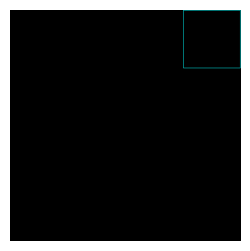

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

# 画一个绿色边框的矩形，参数2：左上角坐标，参数3：右下角坐标
cv2.rectangle(img, (384, 0), (510, 128), (255, 255, 0), 1)

plt.figure(figsize=(3, 3))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()

### 2.1.3 圆绘制

函数：`cv2.circle(img, pts, radius, color, thickness, linetype)`

参数说明：

- `img`：待绘制图像
- `pts`：圆心
- `radius`：半径
- `color`：颜色
- `thickness`：线条的粗细。`-1` 为填充，默认值是 `1`
- `linetype`：线条的类型，使用默认值即可

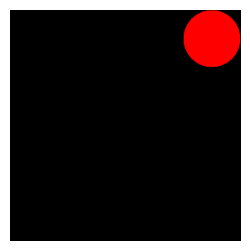

In [10]:
import numpy as np
import cv2

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

# 画一个填充红色的圆，参数2：圆心坐标，参数3：半径
cv2.circle(img, (447, 63), 63, (255, 0, 0), -1)  # 圆心，半径，颜色，填充

plt.figure(figsize=(3, 3))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()

### 2.1.4 椭圆绘制

函数：`cv2.ellipse()`

画椭圆需要的参数比较多，请对照后面的代码理解这几个参数：

参数说明：

- 参数2：椭圆中心 `(x,y)`
- 参数3：`x/y` 轴的长度
- 参数4：`angle` 椭圆的旋转角度
- 参数5：`startAngle` 椭圆的起始角度
- 参数6：`endAngle` 椭圆的结束角度

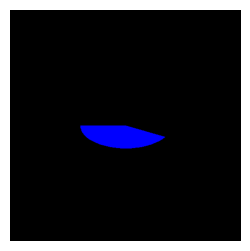

In [12]:
import numpy as np
import cv2

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

# 在图中心画一个填充的半圆
cv2.ellipse(img, (256, 256), (100, 50), 0, 30, 180, (0, 0, 255), -1)  # 中心点坐标，(长，短轴)，旋转角，起始，终止

plt.figure(figsize=(3, 3))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()

### 2.1.5 多边形绘制

函数：`cv2.polylines(img, pts, isClosed, color, thickness, lineType)`

参数说明：

- 参数1：`img` 图像，表示你要在哪张图像上画线
- 参数2：`pts`，表示的是点对，形式如下：
- 参数3：`isClosed`，布尔型，True 表示的是线段闭合，False 表示的是仅保留线段
- 参数4：`color`，线段颜色，格式是（ R,G,B）值
- 参数5：`thickness`, 数值型，线宽度，默认值为1， -1则会填充整个图形
- 参数6：`lineType`，线型

[[10  5]
 [50 10]
 [70 20]
 [20 30]]
[[[10  5]]

 [[50 10]]

 [[70 20]]

 [[20 30]]]


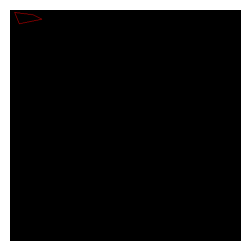

In [17]:
import numpy as np
import cv2

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

# 定义四个顶点坐标
pts = np.array([[10, 5], [50, 10], [70, 20], [20, 30]])
print(pts)
# 顶点个数：4，矩阵变成4*1*2维
pts = pts.reshape((-1, 1, 2))
print(pts)
#绘制椭圆
cv2.polylines(img, [pts], True, (255, 0, 0), 1)
plt.figure(figsize=(3, 3))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()

### 2.1.6 添加文字

函数：`cv2.putText()`

同样请对照后面的代码理解这几个参数：

- 参数2：要添加的文本
- 参数3：文字的起始坐标（左下角为起点）
- 参数4：字体
- 参数5：文字大小（缩放比例）
- 参数6：颜色
- 参数7：线条宽度
- 参数8：线条形状

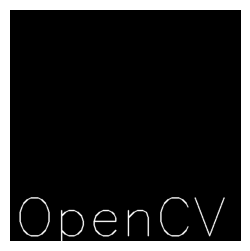

In [16]:
import numpy as np
import cv2

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

#添加文字
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2)  # 待写文字，起点，字体，缩放比例，颜色，线宽，线条形状(默认 8 型)
plt.figure(figsize=(3, 3))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()

### 2.1.7 综合效果

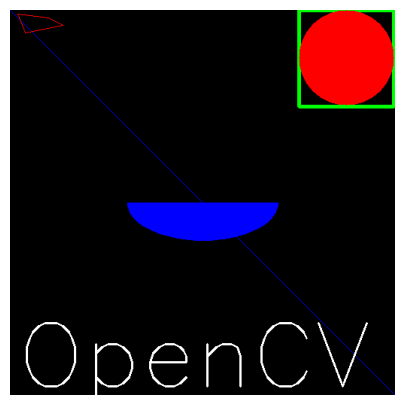

In [15]:
import numpy as np
import cv2

# 创建一张黑色的背景图
img = np.zeros((512, 512, 3), np.uint8)

# 绘制一条线宽为5的线段
cv2.line(img, (0, 0), (511, 511), (0, 0, 255), 1)

# 画一个绿色边框的矩形，参数2：左上角坐标，参数3：右下角坐标
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)

# 画一个填充红色的圆，参数2：圆心坐标，参数3：半径
cv2.circle(img, (447, 63), 63, (255, 0, 0), -1)

# 在图中心画一个填充的半圆
cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, (0, 0, 255), -1)

#绘制多边形
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (255, 0, 0), 1)

# 这里 reshape 的第一个参数为-1, 表明这一维的长度是根据后面的维度的计算出来的。
#添加文字
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2)

plt.figure(figsize=(5, 5))
plt.axis('off')  # 不显示坐标轴
plt.imshow(img)
plt.show()


---

## 2.2 图像的几何变换
### 2.2.1 图像平移

- 将图像中所有的点按照指定的平移量水平或者垂直移动

变换公式

- 设 $(x_0,y_0)$ 为原图像上的一点，图像水平平移量为 $T_x$，垂直平移量为 $T_y$，则平移后的点坐标 $(x_1,y_1)$ 变为

$$
x_1=x_0+T_x\\
y_1=y_0+T_y
$$


仿射变换函数： `cv2.warpAffine(src, M, dsize，borderMode, borderValue)`

其中：

- `src` - 输入图像
- `M` - 变换矩阵 $2\times3$
- `dsize` - 输出图像的大小。
- `flags` - 插值方法的组合（ `int` 类型！）
- `borderMode` - 边界像素模式（ `int` 类型！）
- `borderValue` - （重点！）边界填充值; 默认情况下为 0

上述参数中

- M作为仿射变换矩阵，一般反映平移或旋转的关系，为 `InputArray` 类型的 2×3 的变换矩阵。
- `flages` 表示插值方式，默认为 `flags=cv2.INTER_LINEAR`，表示线性插值，

此外还有

- `cv2.INTER_NEAREST`（最近邻插值）
- `cv2.INTER_AREA` （区域插值）
- `cv2.INTER_CUBIC`（三次样条插值）
- `cv2.INTER_LANCZOS4`（ Lanczos 插值）

(297, 221, 3)
297 221


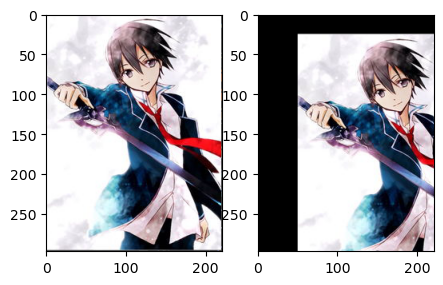

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images1/img2.png')
# 构造移动矩阵H
# 在x轴方向移动多少距离，在y轴方向移动多少距离
H = np.float32([[1, 0, 50], [0, 1, 25]])
rows, cols = img.shape[:2]
print(img.shape)
print(rows, cols)

# 注意这里rows和cols需要反置，即先列后行
plt.figure(figsize=(5, 5))
res = cv2.warpAffine(img, H, (2 * cols, 2 * rows))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
# 和原图的坐标轴范围一样
plt.xlim((0, img.shape[1]))
plt.ylim((img.shape[0]), 0)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

### 2.2.2 图像缩放

#### 2.2.2.1 上采样和下采样

下采样：缩小图像称为下采样（subsampled）或降采样（downsampled）

上采样：放大图像称为上采样（upsampling），主要目的得到更高分辨率图像。

<img alt="sampling" src="assets/sampling.png" width="800"/>

图像缩放： 图像缩放是指图像大小按照指定的比例进行放大或者缩小。

函数：`cv2.resize(src,dsize=None,fx,fy,interpolation)`

- `src`：原图
- `dsize`：输出图像尺寸，与比例因子二选一
- `fx`：沿水平轴的比例因子
- `fy`：沿垂直轴的比例因子
- `interpolation`：插值方法


#### 2.2.2.2 插值法

- 默认为 `cv2.INTER_NEAREST`（最近邻插值）
- `cv2.INTER_LINEAR` 线性插值
- `cv2.INTER_CUBIC` 三次样条插值 $4\times4$ 像素邻域
- `cv2.INTER_LANCZOS4` Lanczos 插值， $8\times8$ 像素邻域
- `cv2.INTER_AREA` 区域插值


##### 最近邻插值

最简单的一种插值方法，不需要计算，在待求像素的四邻像素中，将距离待求像素最近的邻像素灰度赋给待求像素。

设 $i+u, j+v$（$i,j$ 为正整数， $u, v$ 为大于零小于 1 的小数，下同）为待求像素坐标，则待求像素灰度的值 $f(i+u, j+v)$

公式如下

- $\rm srcX=dstX \times (srcWidth/dstWidth)$
- $\rm srcY = dstY \times (srcHeight/dstHeight)$

<p align="center">
  <img alt="nearest" src="assets/nearest.png" width="800"/>
</p>

$$
\begin{aligned}
(0\times(3/4),0\times(3/4))&\Rightarrow(0\times0.75,0\times0.75)&\Rightarrow(0,0)&\Rightarrow234\\

\left(1\times0.75,0\times0.75\right)&\Rightarrow(0.75,0)&\Rightarrow(1,0)&\Rightarrow 67\\

\left(2\times0.75,0\times0.75\right)&\Rightarrow(1.5,0)&\Rightarrow(2,0)&\Rightarrow 89\\

\left(3\times0.75,0\times0.75\right)&\Rightarrow(2.25,0)&\Rightarrow(2,0)&\Rightarrow 89
\end{aligned}
$$
$$


\begin{array}{lllllll}
234 & 38 & 22\\
67 & 44 & 12\\
89 & 65 & 63\\
89 & 65 & 63
\end{array}

\Rightarrow

\begin{array}{lllllll}
234 & 38 & 22 & 22 \\
67 & 44 & 12 & 12 \\
89 & 65 & 63 & 63 \\
89 & 65 & 63 & 63
\end{array}
$$


In [ ]:
def nearest(image, target_size):
    """
    Nearest Neighbour interpolate for RGB  image

    :param image: rgb image
    :param target_size: tuple = (height, width)
    :return: None
    """
    if target_size[0] < image.shape[0] or target_size[1] < image.shape[1]:
        raise ValueError("target image must bigger than input image")
    # 1：按照尺寸创建目标图像
    target_image = np.zeros(shape=(*target_size, 3))
    # 2:计算height和width的缩放因子
    alpha_h = target_size[0]/image.shape[0]
    alpha_w = target_size[1]/image.shape[1]

    for tar_x in range(target_image.shape[0]-1):
        for tar_y in range(target_image.shape[1]-1):
            # 3:计算目标图像人任一像素点
            # target_image[tar_x,tar_y]需要从原始图像
            # 的哪个确定的像素点image[src_x, xrc_y]取值
            # 也就是计算坐标的映射关系
            src_x = round(tar_x/alpha_h)
            src_y = round(tar_y/alpha_w)

            # 4：对目标图像的任一像素点赋值
            target_image[tar_x, tar_y] = image[src_x, src_y]

    return target_image


##### 双线性插值

双线性插值又叫一阶插值法，它要经过三次插值才能获得最终结果，是对最近邻插值法的一种改进，先对两水平方向进行一阶线性插值，然后再在垂直方向上进行一阶线性插值。

![linear](assets/linear.png)

$$
\begin{align}
\frac{y-y_0}{x-x_0}&=\frac{y_1-y_0}{x_1-x_0}\\
y=\frac{x_1-x}{x_1-x_0}&+\frac{x-x_0}{x_1-x_0}
\end{align}
$$

![linear2](assets/linear2.png)

用周边四个点来预测。示例中，P 点为预测点，周围的四个 $Q_{ij}$ 点为原始点。已知 x 求 y。


$$
\begin{align}
f\left(R_1\right) &\approx \frac{x_2-x}{x_2-x_1} f\left(Q_{11}\right)+\frac{x-x_1}{x_2-x_1} f\left(Q_{21}\right) \text { where } R_1=\left(x, y_1\right) \\

f\left(R_2\right) &\approx \frac{x_2-x}{x_2-x_1} f\left(Q_{12}\right)+\frac{x-x_1}{x_2-x_1} f\left(Q_{22}\right) \text { where } R_2=\left(x, y_2\right) \\

f(P) &\approx \frac{y_2-y}{y_2-y_1} f\left(R_1\right)+\frac{y-y_1}{y_2-y_1} f\left(R_2\right) . \\

f(x, y) &\approx \frac{f\left(Q_{11}\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}\left(x_2-x\right)\left(y_2-y\right)+\frac{f\left(Q_{21}\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}\left(x+x_1\right)\left(y_2-y\right) \\

&+\frac{f\left(Q_{12}\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}\left(x_2-x\right)\left(y-y_1\right)+\frac{f\left(Q_{22}\right)}{\left(x_2-x_1\right)\left(y_2-y_1\right)}\left(x-x_1\right)\left(y-y_1\right) .
\end{align}
$$


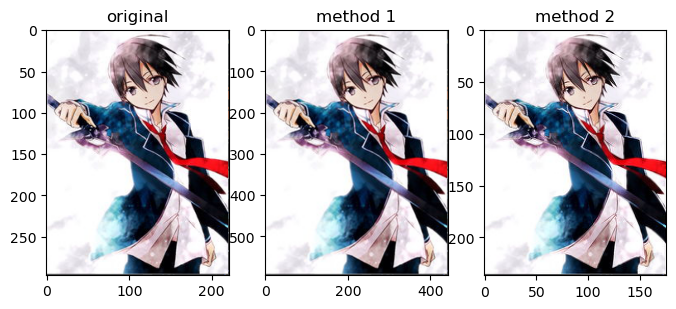

In [2]:
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

img = cv2.imread('images1/img2.png')
# 方法一：通过设置缩放比例，来对图像进行放大或缩小
res1 = cv2.resize(img, None, fx=2, fy=2,
                  interpolation=cv2.INTER_CUBIC)
height, width = img.shape[:2]
# 方法二：直接设置图像的大小，不需要缩放因子
#cv2.INTER_NEAREST（最近邻插值） cv2.INTER_AREA （区域插值） cv2.INTER_CUBIC（三次样条插值） cv2.INTER_LANCZOS4（Lanczos插值）

res2 = cv2.resize(img, (int(0.8 * width), int(0.8 * height)), interpolation=cv2.INTER_LANCZOS4)

plt.subplot(1, 3, 1)
plt.title('original')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title('method 1')
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title('method 2')
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB))
plt.show()

### 2.2.3 图像旋转

以图像的中心为原点，旋转一定的角度，也就是将图像上的所有像素都旋转一个相同的角度。旋转后图像的的大小一般会改变，即可以把转出显示区域的图像截去，或者扩大图像范围来显示所有的图像。图像的旋转变换也可以用矩阵变换来表示。

设点 $P_0(x_0,y_0)$ 逆时针旋转 $\theta$ 角后的对应点为 $P(x,y)$，那么，旋转后点 $P(x,y)$ 的坐标是

$$
\left\{\begin{array}{l}
x=r \cos (\alpha+\theta)=r \cos \alpha \cos \theta-r \sin \alpha \sin \theta=x_0 \cos \theta-y_0 \sin \theta \\
y=r \sin (\alpha+\theta)=r \sin \alpha \cos \theta+r \cos \alpha \sin \theta=x_0 \sin \theta+y_0 \cos \theta
\end{array}\right.
$$

利用上述方法进行图像旋转时需要注意如下两点

1. 图像旋转之前，为了避免信息的丢失，一定要有坐标平移。
2. 图像旋转之后，会出现许多空洞点。对这些空洞点必须进行填充处理，否则画面效果不好，一般也称这种操作为插值处理。



变换矩阵函数：`cv2.getRotationMatrix2D(center, angle, scale)`

参数

- `center`：图片的旋转中心
- `angle`：旋转角度
- `scale`：缩放比例， 0.5表示缩小一半
- 正为逆时针，负值为顺时针

[[  0.70710678   0.70710678 -72.64065633]
 [ -0.70710678   0.70710678 121.62994231]]


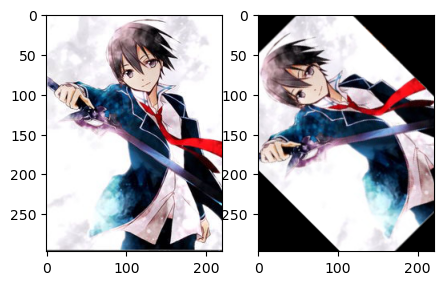

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('images1/img2.png', 1)
rows, cols = img.shape[:2]
#参数1：旋转中心，参数2：旋转角度，参数3：缩放因子
#参数3正为逆时针，负值为正时针
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1, )
print(M)
#第三个参数是输出图像的尺寸中心
dst = cv2.warpAffine(img, M, (cols, rows))
#dst=cv2.warpAffine(img,M,(cols,rows),borderValue=(255,255,255))

plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

plt.show()

### 2.2.4 仿射变换

仿射变换的作用

- 通过仿射变换对图片进行旋转、平移、缩放等操作以达到数据增强的效果

线性变换从几何直观上来看有两个要点

- 变换前是直线，变换后依然是直线
- 直线的比例保持不变

![](assets/affine.png)


仿射变换：平移、旋转、放缩、剪切、反射

仿射变换的函数原型如下

- `M = cv2.getAffineTransform(pos1,pos2)`
- `pos1` 表示变换前的位置
- `pos2` 表示变换后的位置

[[  1.26666667   0.6        -83.33333333]
 [ -0.33333333   1.          66.66666667]]


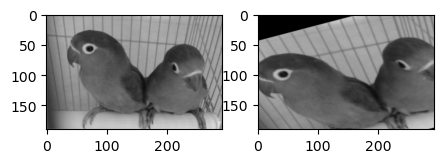

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('images1/bird.png')
#获取图像大小
rows, cols = src.shape[:2]
#设置图像仿射变换矩阵
pos1 = np.float32([[50, 50], [200, 50], [50, 200]])
pos2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pos1, pos2)
print(M)

#图像仿射变换
result = cv2.warpAffine(src, M, (2 * cols, 2 * rows))
#显示图像
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)

# 限定一下图像坐标轴范围
plt.xlim((0, src.shape[1]))
plt.ylim((src.shape[0]), 0)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

### 2.2.5 透视变换

本质是将图像投影到一个新的视平面。

函数：

- `M = cv2.getPerspectiveTransform(pos1, pos2)`
  - `pos1` 表示透视变换前的 4 个点对应位置
  - `pos2` 表示透视变换后的 4 个点对应位置
- `cv2.warpPerspective(src,M,(cols,rows))`
  - `src` 表示原始图像
  - `M` 表示透视变换矩阵
  - `(rows,cols)` 表示变换后的图像大小， `rows` 表示行数，`cols` 表示列数

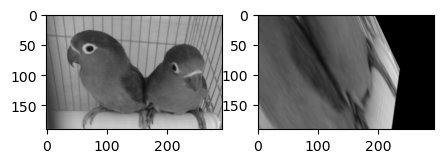

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('images1/bird.png')
#获取图像大小
rows, cols = src.shape[:2]
#设置图像透视变换矩阵
pos1 = np.float32([[114, 82], [287, 156],
                   [8, 100], [143, 177]])
pos2 = np.float32([[0, 0], [188, 0],
                   [0, 262], [188, 262]])
M = cv2.getPerspectiveTransform(pos1, pos2)
#图像透视变换
result = cv2.warpPerspective(src, M, (2 * cols, 2 * rows))
#显示图像
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)

# 限定一下图像坐标轴范围
plt.xlim((0, src.shape[1]))
plt.ylim((src.shape[0]), 0)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

### 细说仿射变换和透视变换

#### 1. 仿射变换 (Affine Transformation)
**原理**：仿射变换是线性变换的一种扩展。它可以保持两个特点：直线的“直性”（即直线仍然是直线）和平行线的“平行性”（即平行线仍然平行）。具体来说，仿射变换可以描述为平移、旋转、缩放和倾斜的组合。

**数学表达 1**：在二维平面上，仿射变换可以表示为：
$$
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & t_x \\ c & d & t_y \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} 其中 \(x'\) 和 \(y'\) 是变换后的坐标，\(x\) 和 \(y\) 是原始坐标。
$$

**数学表达 2**
$$\begin{bmatrix} x' \\ y' \end{bmatrix} = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} t_x \\ t_y \end{bmatrix}$$
其中 $\(\begin{bmatrix} x' \\ y' \end{bmatrix}\)$ 是变换后的坐标，$\(\begin{bmatrix} x \\ y \end{bmatrix}\)$ 是原始坐标，$\(\begin{bmatrix} a & b \\ c & d \end{bmatrix}\)$ 是线性变换矩阵，$\(\begin{bmatrix} t_x \\ t_y \end{bmatrix}\)$ 是平移向量。



**例子**：图像的缩放、旋转和平移都是仿射变换的例子。

#### 2. 透视变换 (Perspective Transformation)

**原理**：透视变换是将一个二维平面上的点映射到另一个二维平面上的点的变换，但它不能保证平行性。透视变换可以模拟相机从不同的角度和距离观察物体时产生的透视效果。

**数学表达**：透视变换的表达式是：
$$
\begin{bmatrix} x' \\ y' \\ w' \end{bmatrix} = \begin{bmatrix} a & b & t_x \\ c & d & t_y \\ h & i & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}

$$
其中 \(x'\) 和 \(y'\) 是变换后的坐标，而 \(x'/w'\) 和 \(y'/w'\) 才是实际的新坐标。

**例子**：摄像头捕捉到的场景中，远处的物体看起来更小，而近处的物体看起来更大，这就是透视变换的效果。

---
#### 对比
自由度：仿射变换有6个自由度（旋转、缩放、错切、平移），而透视变换有8个自由度。
平行线特性：仿射变换保持平行线为平行，而透视变换可能使平行线在投影后交汇。
应用场景：仿射变换主要用于图像的简单变换（如旋转、平移等），而透视变换更多地用于模拟3D视觉效果或修复扭曲的图像。
简单来说，仿射变换是更简单的变换，而透视变换则可以模拟更为复杂的3D效果。

在透视变换中，例如你在斜着看一条铁轨，虽然现实中这两条铁轨是平行的，但在你的视角下，它们看起来就像是要在远方交汇。这是一个经典的透视变换例子。而在仿射变换中，不论你如何变换，那两条铁轨在图像中依然是平行的。

仿射变换：
- 假设我们从一个正方形开始，然后对其进行仿射变换。这可能导致正方形变成一个平行四边形，但其对边仍然保持平行。

透视变换：
- 假设我们用摄像头对一个平面拍照，但摄像头不是正对该平面。结果可能是一个梯形或其他四边形，其对边不再平行。

#### 更多的例子

仿射变换：
1. **图像的旋转**：当你将一张图片顺时针或逆时针旋转一个角度时，你正在执行一个仿射变换。此变换不会改变图像中的平行线。

2. **图像的缩放**：将图片放大或缩小是仿射变换的另一个例子。无论你如何缩放图像，图像中的任何平行线都仍然会保持平行。

3. **图像的错切**：当你沿一个轴偏移图像，使其变形成为平行四边形时，你正在进行错切。错切后，原始图像中的平行线仍然保持平行。换句话说，它会使图像斜拉伸。错切变换会使图像中的点沿一个轴移动，移动的距离与点在另一轴上的位置成正比。可以分为两种基本类型的错切：
- 水平错切：图像中的点根据其在垂直方向上的位置进行水平移动。
- 垂直错切：图像中的点根据其在水平方向上的位置进行垂直移动。
例如，考虑一张正方形的图片。进行水平错切后，它可能变成一个右边或左边斜向上或下的平行四边形。而进行垂直错切后，它可能变成一个上边或下边斜向左或右的平行四边形。

4. **图像的平移**：简单地移动图像到新的位置，例如向左、向右、向上或向下移动，也是一种仿射变换。

透视变换：

1. **摄像机的投影**：当你使用摄像机从一侧拍摄一个长方形物体（例如门或窗），在图片中，这个长方形可能会看起来像一个梯形。尽管实际上门的两边是平行的，但在图像中它们似乎会在某个远方点交汇。

2. **计算机游戏中的3D渲染**：在许多计算机游戏中，为了创建真实感，物体根据它们距离虚拟摄像机的远近进行透视变换。例如，一条直路在3D游戏中可能在玩家视角下看起来是收敛的，尽管在游戏的"现实"中这条路是直的。

3. **拍摄倾斜的书籍或屏幕**：当你斜着拍摄一个书页或计算机屏幕时，尽管它们实际上是矩形的，但在照片中，它们可能看起来像一个梯形或其他形状。

4. **建筑物的拍摄**：当你站在建筑物的底部向上看时，建筑物的边缘似乎是向一个消失点收敛的，即使在现实生活中这些建筑物的边缘是平行的。

总的来说，仿射变换更多地涉及图像的线性变换，而不会改变平行性。而透视变换可以模拟3D空间中的深度和距离，使图像中原来平行的线条看起来像是在远方交汇。

---

### 作业

#### 作业 1：利用图像的几何变换，对文档进行矫正

In [10]:
#encoding:utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
src = cv2.imread('images1/paper.png')

#获取图像大小
rows, cols = src.shape[:2]

#将源图像高斯模糊
img = cv2.GaussianBlur(src, (3, 3), 0)
#进行灰度化处理
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#边缘检测（检测出图像的边缘信息）
edges = cv2.Canny(gray, 50, 250, apertureSize=3)
cv2.imwrite("images1/canny.jpg", edges)
cv2.imshow("canny", edges)
#通过霍夫变换得到A4纸边缘
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=90, maxLineGap=10)
print(lines)
#下面输出的四个点分别为四个顶点
for x1, y1, x2, y2 in lines[0]:
    print(x1, y1)
    print(x2, y2)
for x3, y3, x4, y4 in lines[1]:
    print(x3, y3)
    print(x4, y4)

#绘制边缘
for x1, y1, x2, y2 in lines[0]:
    cv2.line(gray, (x1, y1), (x2, y2), (0, 0, 255), 1)

#根据四个顶点设置图像透视变换矩阵
pos1 = np.float32([[114, 82], [287, 156], [8, 322], [216, 333]])
pos2 = np.float32([[0, 0], [188, 0], [0, 262], [188, 262]])
M = cv2.getPerspectiveTransform(pos1, pos2)
# pos1 = np.float32([[114, 82], [287, 156], [8, 322]])
# pos2 = np.float32([[0, 0], [188, 0], [0, 262]])
# M = cv2.getAffineTransform(pos1,pos2)
print(M)
#图像仿射变换
#result = cv2.warpAffine(src, M, (2*cols, 2*rows))


#图像透视变换
result = cv2.warpPerspective(src, M, (190, 272))

#显示图像
cv2.imshow("original", src)
cv2.imshow("result", result)

cv2.imshow("gray", gray)
#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[  8 332 114  82]]

 [[217 330 287 155]]

 [[  8 333 160 392]]

 [[116  83 286 155]]

 [[255  20 294 136]]

 [[  9 331  84 154]]]
8 332
114 82
217 330
287 155
[[ 5.66589226e-01  2.50243575e-01 -8.51111449e+01]
 [-3.46690724e-01  8.10506692e-01 -2.69388062e+01]
 [-1.14188388e-03 -3.35875357e-04  1.00000000e+00]]


#### 作业 2：利用几何变化，对图像进行扩增

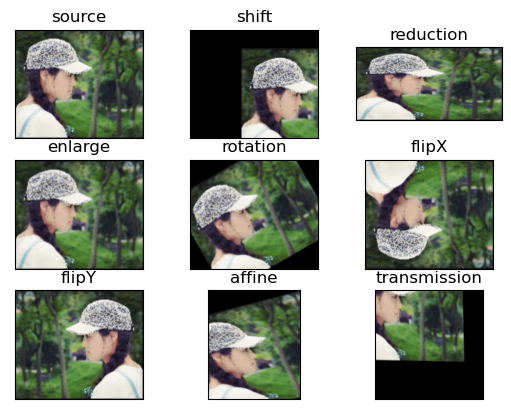

In [9]:
#encoding:utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

#读取图片
img = cv2.imread('images1/test2.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#图像平移矩阵
M = np.float32([[1, 0, 80], [0, 1, 30]])
rows, cols = image.shape[:2]
img1 = cv2.warpAffine(image, M, (cols, rows))

#图像缩小
img2 = cv2.resize(image, (200, 100))

#图像放大
img3 = cv2.resize(image, None, fx=1.1, fy=1.1)

#绕图像的中心旋转
#源图像的高、宽 以及通道数
rows, cols, channel = image.shape
#函数参数：旋转中心 旋转度数 scale
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 30, 1)
#函数参数：原始图像 旋转参数 元素图像宽高
img4 = cv2.warpAffine(image, M, (cols, rows))

#图像翻转
img5 = cv2.flip(image, 0)  #参数=0以X轴为对称轴翻转
img6 = cv2.flip(image, 1)  #参数>0以Y轴为对称轴翻转

#图像的仿射
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)
img7 = cv2.warpAffine(image, M, (rows, cols))

#图像的透射
pts1 = np.float32([[56, 65], [238, 52], [28, 237], [239, 240]])
pts2 = np.float32([[0, 0], [200, 0], [0, 200], [200, 200]])
M = cv2.getPerspectiveTransform(pts1, pts2)
img8 = cv2.warpPerspective(image, M, (200, 200))

#循环显示图形
titles = ['source', 'shift', 'reduction', 'enlarge', 'rotation', 'flipX', 'flipY', 'affine', 'transmission']
images = [image, img1, img2, img3, img4, img5, img6, img7, img8]
for i in range(9):
    plt.subplot(3, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


#### 作业3：使用 numpy 手推双线性插值，不要使用 opencv 等封装好的函数。（图片使用之前示例的图）